In [1]:
# !pip install konlpy
# !pip install tensorflow

In [2]:
import pandas as pd
df = pd.read_csv('news_raw2.csv', encoding='euc-kr')

In [3]:
df.isna().sum()
df = df.dropna(how='any')

In [4]:
df

,url,summary,target
0,https://n.news.naver.com/mnews/article/009/000...,"롯데, 우수 인재 확보 강화...신입사원 연 4회 통합선발\n롯데그룹이 신입사원 수...",0
1,https://n.news.naver.com/mnews/article/374/000...,모범납세자 569명 포상…금탑훈장에 ㈜동서\n기획재정부와 국세청은 '제58회 납세자...,0
2,https://n.news.naver.com/mnews/article/123/000...,이번엔 골수 줄기세포 주사?... 실손보험금 반년 새 ‘줄줄’ 샌다\n지난해 7월 ...,0
3,https://n.news.naver.com/mnews/article/366/000...,SK하이닉스 “키옥시아·WD 합병 관련 정부 설득 없었다”\n일본 낸드플래시 기업인...,0
4,https://n.news.naver.com/mnews/article/011/000...,"'반값 아파트' 토지임대부 주택, 개인 간 거래 허용된다\n앞으로 '반값 아파트'로...",0
...,...,...,...
73,https://n.news.naver.com/mnews/article/018/000...,"""자산가 늘어나면서 하이엔드 주택 시장 급성장할 것""\n부동산 시행사 더랜드의 김완...",1
74,https://n.news.naver.com/mnews/article/031/000...,"""금리 낮아지면 침체 주택시장 반전하나요""\n거래량이 줄고 가격 하락세가 지속되는 ...",1
75,https://n.news.naver.com/mnews/article/025/000...,"[단독]美빌딩에 정부 돈 1800억 넣은 미래에셋, 전액 날릴 위기\n미래에셋자산운...",1
76,https://n.news.naver.com/mnews/article/014/000...,"개인정보위, '홍채 수집' 월드코인 조사 착수\n개인정보보호위원회가 홍채인식 정보를...",1


In [5]:
sample_text = df.loc[:,('summary')].to_numpy()

In [6]:
from konlpy.tag import Kkma
kkma = Kkma()
my_nouns=[]

idx = 0
for txt in sample_text:
    idx+=1
    if txt == '':
        continue
    nouns = kkma.nouns(txt)
    for noun in nouns:
        if len(noun) > 1:
            my_nouns.append(noun)

In [7]:
from tensorflow.keras import preprocessing

In [8]:
tokenizer = preprocessing.text.Tokenizer(num_words=300)
tokenizer.fit_on_texts(my_nouns)

In [9]:
one_hot_results = tokenizer.texts_to_matrix(sample_text, mode='binary')
print( "one_hot_results", one_hot_results  )

one_hot_results [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
labels = [0]

In [11]:
data = one_hot_results

In [12]:
target = df.loc[:,('target')]

In [13]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(300,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [15]:
history = model.fit(train_input,
                   train_target,
                   epochs=50,
                   validation_data=(test_input,test_target),
                   verbose=0)

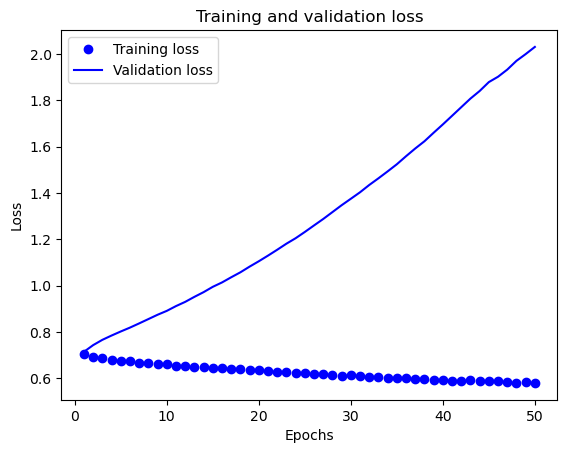

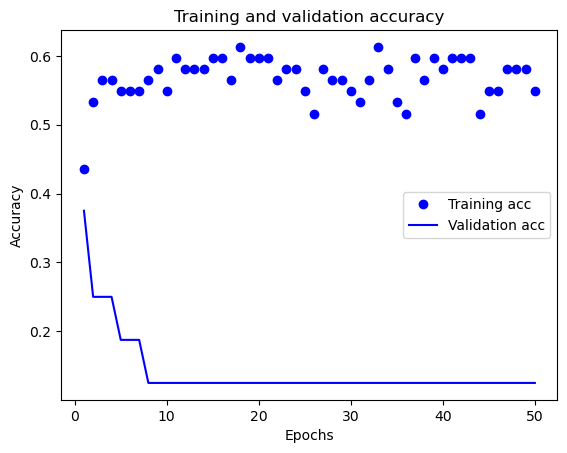

In [16]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # 그래프를 초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()